In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

from context import predicate_search
from predicate_search import PredicateData, PredicateSearch, ContBasePredicate

In [2]:
class SynthSingleTarget:
    
    def __init__(self, n=2000, m=2, att_min=0, att_max=100, mu=80, med_outlier_lower=20, med_outlier_upper=80,
                 high_outlier_lower=40, high_outlier_upper=60):
        self.n = n
        self.m = m
        self.att_min = att_min
        self.att_max = att_max
        self.mu = mu
        self.med_outlier_lower = med_outlier_lower
        self.med_outlier_upper = med_outlier_upper
        self.high_outlier_lower = high_outlier_lower
        self.high_outlier_upper = high_outlier_upper
        
    def generate_attributes(self, n, m, att_min, att_max):
        attributes = pd.DataFrame(np.random.uniform(att_min, att_max, size=(n, m)))
        attributes.columns = [f"f{col}" for col in attributes.columns]
        return attributes
        
    def generate_target(self, attributes, mu):
        att = list(attributes.columns)
        attributes['med_outlier'] = np.all(attributes[att] >= self.med_outlier_lower, axis=1
                                          ) & np.all(attributes[att] <= self.med_outlier_upper, axis=1)
        attributes['high_outlier'] = np.all(attributes[att] >= self.high_outlier_lower, axis=1
                                           ) & np.all(attributes[att] <= self.high_outlier_upper, axis=1)
        attributes['outlier_type'] = attributes.med_outlier.astype(int) + attributes.high_outlier.astype(int)
        attributes['mu'] = attributes.outlier_type.map({0: 10, 1: (mu + 10)/2, 2: mu})
        attributes['val'] = np.random.normal(attributes.mu, 10)
        
        return attributes[att + ['val']], attributes.med_outlier, attributes.high_outlier
    
    def generate_data(self):
        attributes = self.generate_attributes(self.n, self.m, self.att_min, self.att_max)
        data, med_outlier, high_outlier = self.generate_target(attributes, self.mu)
        return data, med_outlier, high_outlier

In [3]:
synth = SynthSingleTarget()
data = synth.generate_data()[0]

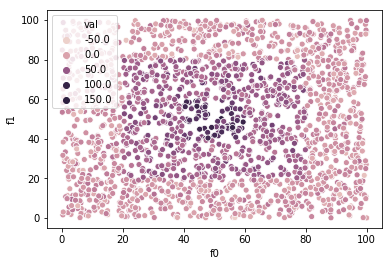

In [4]:
sns.scatterplot(x='f0', y='f1', hue='val', data=data)